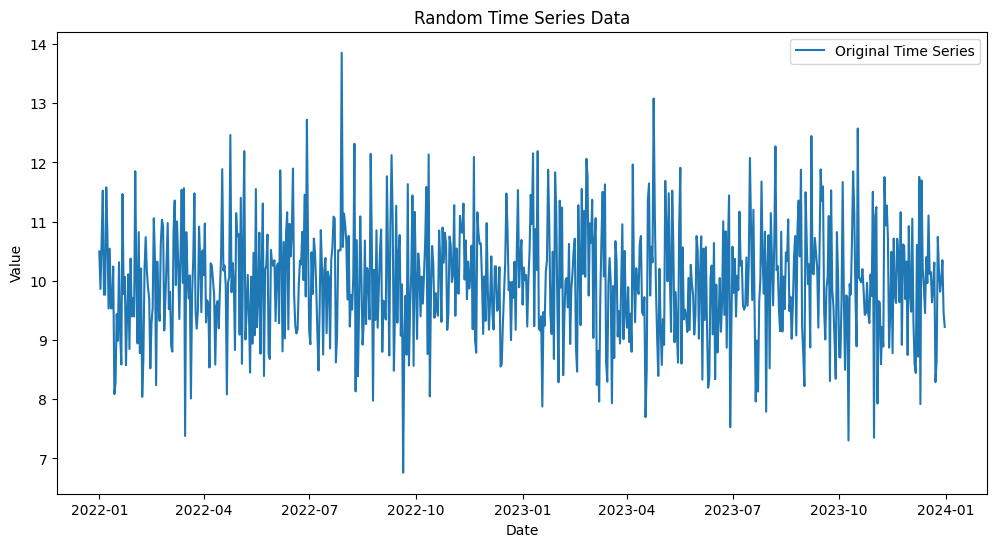

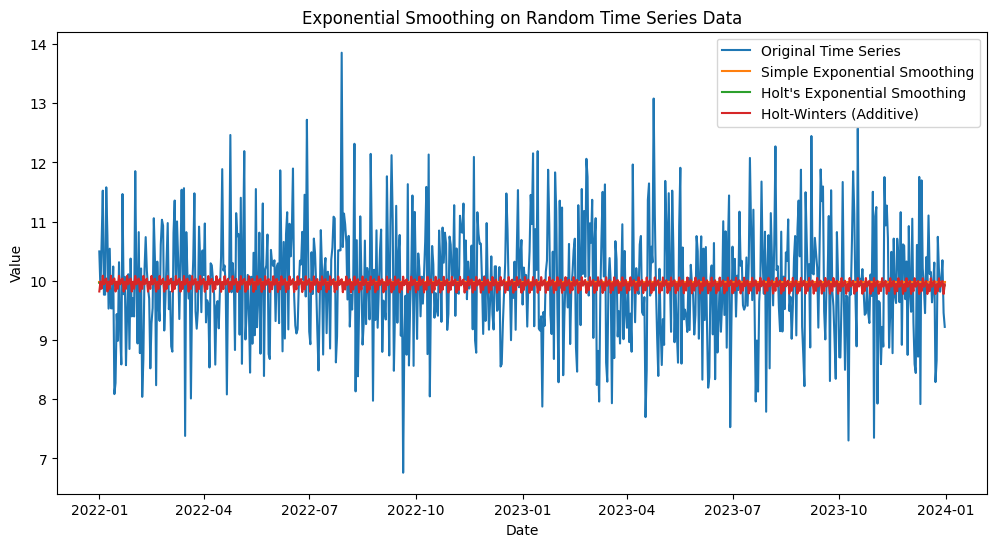

RMSE Simple Exponential Smoothing: 0.9833378533841485
RMSE Holt's Exponential Smoothing: 0.984168494679105
RMSE Holt-Winters (Additive): 0.9855519114745747


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Set a seed for reproducibility
np.random.seed(42)

# Generate synthetic time series data
date_rng = pd.date_range(start='2022-01-01', end='2023-12-31', freq='D')
time_series_data = np.random.randn(len(date_rng)) + 10  # Example random time series

# Create a DataFrame with a proper datetime index
time_series_df = pd.DataFrame({'Value': time_series_data}, index=date_rng)

# Plot the original time series
plt.figure(figsize=(12, 6))
plt.plot(time_series_df.index, time_series_df['Value'], label='Original Time Series')
plt.title('Random Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Apply three types of exponential smoothing

# Simple Exponential Smoothing
model_simple = ExponentialSmoothing(time_series_df['Value'], trend=None, seasonal=None, freq='D').fit()
forecast_simple = model_simple.forecast(len(time_series_df))

# Holt's Exponential Smoothing
model_holt = ExponentialSmoothing(time_series_df['Value'], trend='add', seasonal=None, freq='D').fit()
forecast_holt = model_holt.forecast(len(time_series_df))

# Holt-Winters Exponential Smoothing (Additive)
model_hw_additive = ExponentialSmoothing(time_series_df['Value'], trend='add', seasonal='add', freq='D').fit()
forecast_hw_additive = model_hw_additive.forecast(len(time_series_df))

# Plot the original time series and the smoothed series
plt.figure(figsize=(12, 6))
plt.plot(time_series_df.index, time_series_df['Value'], label='Original Time Series')
plt.plot(time_series_df.index, forecast_simple, label='Simple Exponential Smoothing')
plt.plot(time_series_df.index, forecast_holt, label="Holt's Exponential Smoothing")
plt.plot(time_series_df.index, forecast_hw_additive, label='Holt-Winters (Additive)')
plt.title('Exponential Smoothing on Random Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Print the RMSE for each smoothing technique
print("RMSE Simple Exponential Smoothing:", mean_squared_error(time_series_df['Value'], forecast_simple)**0.5)
print("RMSE Holt's Exponential Smoothing:", mean_squared_error(time_series_df['Value'], forecast_holt)**0.5)
print("RMSE Holt-Winters (Additive):", mean_squared_error(time_series_df['Value'], forecast_hw_additive)**0.5)
